** Contents **
1. display image using gray level bar

1. DFT using numpy (np.fft.fft2())
 
2. DFT using opencv

# Display image using bar

In [1]:
import numpy as np
import cv2
from skimage import data, io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.linspace(0,10,10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

[[150 107  65 ... 122 117 120]
 [173 142 115 ... 120 117 116]
 [196 179 166 ... 122 119 116]
 ...
 [175 176 173 ...   0   0   0]
 [173 172 172 ...   0   1   0]
 [173 171 168 ...   0   1   0]]


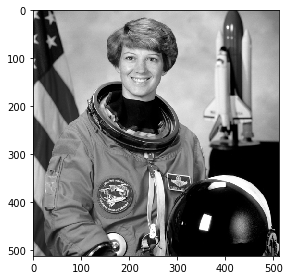

In [3]:
im = data.astronaut()
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
io.imshow(im)
print(im)

show the gray level of the image with 3d plot

The image canbe considered as z=f(x,y) where (x,y) is the position, z is the magnitude

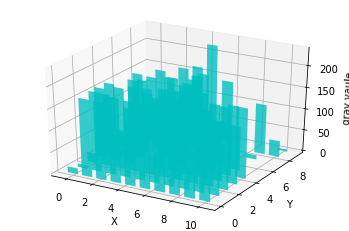

In [4]:
imd = cv2.resize(im,(10,10))
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = np.linspace(0,imd.shape[0],imd.shape[0])
# y = np.linspace(0,im.shape[1],1)
for i in range(imd.shape[0]):
    y=imd[i,:]
    
    ax.bar(x,y,zs=i,zdir='y', color='c', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('gray vaule')
plt.show()

# DFT of image using numpy
## DFT 

numpy dft size:(512, 512)
original fft values:[[ -306.           +0.j         -1187.70064645 -495.33653992j
    227.4446236    -6.98776479j  1420.46733243-1065.34013429j
   -515.10845298-1377.94436401j]
 [  291.60883353 -505.80777548j   814.41058905 -930.18547029j
   -616.88815266 -840.74130291j   591.99990413 +971.27236015j
   -350.13940289-1336.50195402j]
 [-1126.3521501 -1276.81825325j  -123.60246696 -313.03636696j
   -555.58780223+1148.97421703j  -374.92235131 +326.97545105j
    -47.40896755 -909.55604346j]
 [ 2452.94183075 -126.25320675j   868.07599998 -792.94726915j
  -2296.36950085 -671.92986218j   367.16064044+1002.82422735j
  -1044.75050048 +749.15761522j]
 [  -37.88054556 -357.78468652j -1171.58032429 -902.48069276j
    487.81768275  -27.27181899j  -190.81802754 -763.27046454j
    799.7036426   +42.82016943j]]


(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

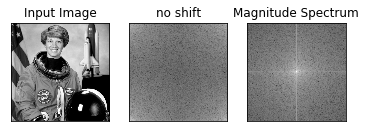

In [5]:
f = np.fft.fft2(im)
print('numpy dft size:{}'.format(f.shape))

# phase map
# phase = np.angle(f)
# centerize 
fshift= np.fft.fftshift(f)
print('original fft values:{}'.format(fshift[0:5,0:5]))
# np.abs to get the magnitude
magnitude_spectrum =20*np.log(np.abs(fshift))

plt.subplot(131),plt.imshow(im, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(20*np.log(np.abs(f)), cmap = 'gray')
plt.title('no shift'), plt.xticks([]), plt.yticks([]) 

plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) 


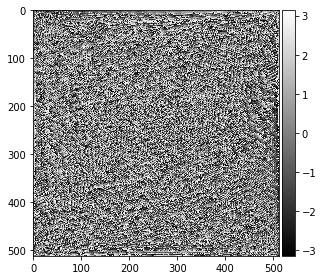

In [6]:
io.imshow(phase, cmap='gray')

## keep the center of the DFT image (exercise 3)

The lighter of the pixels, the lower of the frequency. <font color ='red'>The low frequency represents the boundary</font>

In [7]:
get 
rows, cols = im.shape 
# find the center coordinates
crow,ccol = np.int(rows/2) , np.int(cols/2)

print('rows:{},cols:{}'.format(rows, cols))

# change this from small to large, see the edge changes
num=60
fshift[crow-num:crow+num, ccol-num:ccol+num] = 0 

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)

plt.subplot(131),plt.imshow(im, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([]) 

plt.subplot(132),plt.imshow((np.abs(img_back)), cmap = 'gray') 
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow((np.abs(img_back)))
plt.title('Result in JET'), plt.xticks([]), plt.yticks([]) 

AttributeError: 'NoneType' object has no attribute 'shape'

In [8]:
img_back

array([[ 25.24090246-0.00277012j, -27.98678804-0.21240136j,
        -78.31305958-0.6152296j , ...,  32.36999472-0.59426176j,
         16.1267549 -0.26386521j,   6.94014188-0.03220017j],
       [ 36.61404597-0.87595107j,  -3.71485928-1.2075521j ,
        -38.79324224-1.55486668j, ...,  13.43294666-0.53725463j,
          1.03544272-0.52403974j, -10.22867004-0.63517889j],
       [ 47.34556805-1.5164526j ,  20.29260234-1.80305479j,
         -1.50749934-1.9072314j , ...,   2.30806827-0.31151215j,
         -9.24977292-0.67158593j, -22.19657113-1.10760809j],
       ...,
       [ 74.01964828+1.10946834j,  54.23301794+1.77222869j,
         35.19928916+2.25388534j, ..., -38.81328028-0.1200881j ,
        -56.16398349+0.01894059j, -78.00868315+0.46436566j],
       [ 66.50725394+1.23500676j,  49.05357795+1.61772009j,
         36.60779473+1.70323986j, ..., -53.14064904-0.32624236j,
        -67.93993765+0.09488631j, -87.66670381+0.67097551j],
       [ 58.42154299+0.80118578j,  43.70215053+0.85620147j

# DFT using opencv

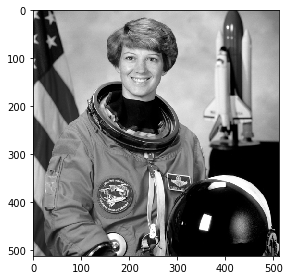

In [9]:
img = data.astronaut()
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
io.imshow(img)

In [10]:
cv2.dft??

Docstring:
dft(src[, dst[, flags[, nonzeroRows]]]) -> dst
.   @brief Performs a forward or inverse Discrete Fourier transform of a 1D or 2D floating-point array.
.   
.   The function cv::dft performs one of the following:
.   -   Forward the Fourier transform of a 1D vector of N elements:
.       \f[Y = F^{(N)}  \cdot X,\f]
.       where \f$F^{(N)}_{jk}=\exp(-2\pi i j k/N)\f$ and \f$i=\sqrt{-1}\f$
.   -   Inverse the Fourier transform of a 1D vector of N elements:
.       \f[\begin{array}{l} X'=  \left (F^{(N)} \right )^{-1}  \cdot Y =  \left (F^{(N)} \right )^*  \cdot y  \\ X = (1/N)  \cdot X, \end{array}\f]
.       where \f$F^*=\left(\textrm{Re}(F^{(N)})-\textrm{Im}(F^{(N)})\right)^T\f$
.   -   Forward the 2D Fourier transform of a M x N matrix:
.       \f[Y = F^{(M)}  \cdot X  \cdot F^{(N)}\f]
.   -   Inverse the 2D Fourier transform of a M x N matrix:
.       \f[\begin{array}{l} X'=  \left (F^{(M)} \right )^*  \cdot Y  \cdot \left (F^{(N)} \right )^* \\ X =  \frac{1}{M \cdot N} \c

dft shape:(512, 512, 2)


(Text(0.5, 1.0, 'magnitude spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

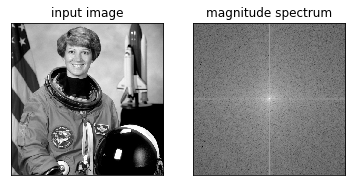

In [11]:
# complex dft [..,0] is real and dft[...,1] Imaginary number， [h,w,2]
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
print('dft shape:{}'.format(dft.shape))

dft_shift = np.fft.fftshift(dft)
# dft_shift = dft

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) 

# show the result
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap = 'gray')
plt.title('magnitude spectrum'), plt.xticks([]), plt.yticks([])


## remove the center of DFT (exercise 4)

In [12]:
dft.shape

(512, 512, 2)

(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

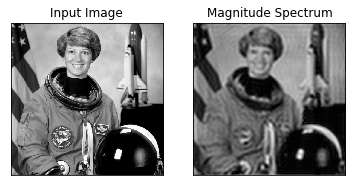

In [13]:

rows, cols = img.shape 
crow,ccol = np.int(rows/2) , np.int(cols/2)
 
# create a mask first, center square is 1, remaining are all zeros
mask = np.zeros((rows,cols,2),np.uint8) 
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
 
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift) 
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
 
plt.subplot(121),plt.imshow(img, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) 


D:\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


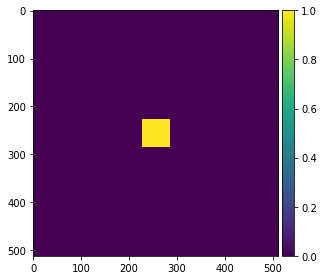

In [14]:
io.imshow(mask[...,0])

# DFT simulated execises


## Exercise 1

dft values：[[-5.64656116e-32-1.42683227e-31j  5.92580387e-17+3.18549232e-17j
  -4.11664644e-17+1.07136665e-17j  1.22600267e-16-1.81299992e-16j
   1.93625945e-16+1.37424750e-16j -6.57118159e-17-1.08065636e-17j
  -1.02330783e-17+6.70672391e-17j  1.65766102e-16+5.52090665e-16j
   9.53024315e-17-1.61909300e-16j -8.86990751e-17+1.60487615e-16j]
 [ 7.31769698e-17-2.25372561e-17j -9.54679374e-02-3.00020080e-03j
   1.81545962e-01+8.56149021e-03j -2.49814793e-01-1.57170146e-02j
   2.93602160e-01+2.31069911e-02j -3.08634943e-01-2.91745918e-02j
   2.93456207e-01+3.23978669e-02j -2.49566421e-01-3.15275708e-02j
   1.81275169e-01+2.57992770e-02j -9.52780069e-02-1.50905538e-02j]
 [-1.39898823e-16+4.06918656e-17j  1.81545962e-01+8.56149021e-03j
  -3.45150292e-01-2.17150158e-02j  4.74823513e-01+3.73694209e-02j
  -5.57911721e-01-5.27381850e-02j  5.86331483e-01+6.47315983e-02j
  -5.57356347e-01-7.04104809e-02j  4.73878417e-01+6.74428860e-02j
  -3.44119881e-01-5.45032347e-02j  1.80823245e-01+3.15587082e-0

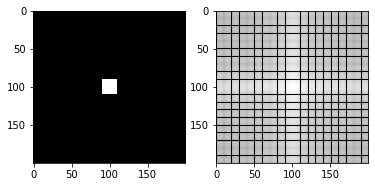

In [6]:
# create the image
# im = cv2.imread('lena.jpg')
# im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
rec = np.zeros((200,200))


rec[90:110,90:110]=1
# io.imshow(rec)

# DFT
dft = np.fft.fft2(rec)
# shift to the center
s_dft=np.fft.fftshift(dft)
print('dft values：{}'.format(s_dft[:10,:10]))

# show the image --- complex -> real 
shw_dft=50*np.log(np.abs(s_dft)+10e-9)
print('new values:{}'.format(shw_dft[:10,:10]))

# show the original gray image
plt.subplot(121)
plt.imshow(rec,cmap='gray')

# show the dft result
plt.subplot(122)
plt.imshow(shw_dft,cmap='gray')

## Exercise 2

s_dft values:[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Text(0.5, 1.0, 'shift')

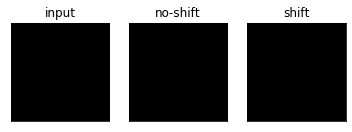

In [16]:
s= np.zeros((200,200))
# s[100:110,:]=1
# s[:,100:110]=1
# s[:,50:60]=1
# s[:,20:30]=1

s_dft = np.fft.fft2(s)
s_shiftdft = np.fft.fftshift(s_dft)
print('s_dft values:{}'.format(s_dft[:10,:10]))
plt.subplot(131)
plt.imshow(s,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('input')

plt.subplot(132)
plt.imshow(20*np.log(np.abs(s_dft)+1e-9),cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('no-shift')
# io.imshow(20*np.log(np.abs(s_dft)+1e-9))
plt.subplot(133)
plt.imshow(20*np.log(np.abs(s_shiftdft)+1e-9), cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('shift')
# io.imshow(20*np.log(np.abs(s_shiftdft)+1e-9))


## from 0 to 1, the change is Violent, 

noshift-dft values:[[ 2.00000000e+03+0.00000000e+00j -1.97199583e+03+2.80656568e+02j
   1.88946130e+03-5.48939253e+02j -1.75673787e+03+7.93197562e+02j
   1.58075935e+03-1.00318039e+03j -1.37062047e+03+1.17062047e+03j
   1.13701440e+03-1.28968968e+03j -8.91576951e+02+1.35729619e+03j
   6.46181636e+02-1.37320588e+03j -4.12232309e+02+1.33998206e+03j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.000

Text(0.5, 1.0, 'input')

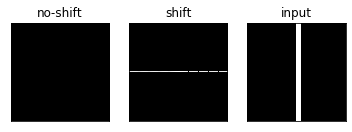

In [17]:
s= np.zeros((200,200))
# s[100:110,:]=1
s[:,100:110]=1
# s[:,50:60]=1
# s[:,20:30]=1

s_dft = np.fft.fft2(s)
print('noshift-dft values:{}'.format(s_dft[:10,:10]))
s_shiftdft = np.fft.fftshift(s_dft)
plt.subplot(131)
plt.imshow(20*np.log(np.abs(s_dft)+1e-9),cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('no-shift')
# io.imshow(20*np.log(np.abs(s_dft)+1e-9))
plt.subplot(132)
plt.imshow(20*np.log(np.abs(s_shiftdft)+1e-9), cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('shift')
# io.imshow(20*np.log(np.abs(s_shiftdft)+1e-9))
plt.subplot(133)
plt.imshow(s,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('input')

In [18]:
s_dft

array([[ 2000.          +0.j        , -1971.99583096+280.65656794j,
         1889.46130036-548.93925251j, ..., -1756.73786834-793.19756211j,
         1889.46130036+548.93925251j, -1971.99583096-280.65656794j],
       [    0.          +0.j        ,     0.          +0.j        ,
            0.          +0.j        , ...,     0.          +0.j        ,
            0.          +0.j        ,     0.          +0.j        ],
       [    0.          +0.j        ,     0.          +0.j        ,
            0.          +0.j        , ...,     0.          +0.j        ,
            0.          +0.j        ,     0.          +0.j        ],
       ...,
       [    0.          +0.j        ,     0.          +0.j        ,
            0.          +0.j        , ...,     0.          +0.j        ,
            0.          +0.j        ,     0.          +0.j        ],
       [    0.          +0.j        ,     0.          +0.j        ,
            0.          +0.j        , ...,     0.          +0.j        ,
       